# Simulating a random variable

The objective of this notebook is to give a feeling of what a random variable is. We will do this by the mean of simulations. 
First we will simulate the experiment of tossing a coin. Then we will simulate the rolling of a die. 
We will build *histograms* using the outcome of these two experiments. This will lead us to the notion of *probability distribution function* in the case of a discrete random variable. 

Finnaly, we will code a function allowing to simulate values comming from a discrete random variable with an arbitrary *probability distribution*.


In [1]:
import random, bisect
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
# Some useful functions

def flipCoin(n):
    # Simulates n flips of a fair coin
    values = []
    for i in range(n):
        s = random.random()
        if s < 0.5:
            values.append(0)
        else:
            values.append(1)
    return(values)


def rollDie(n):
    # Simulates n rolls of a fair die
    values = []
    for i in range(n):
        s = random.random()
        if s < 1./6:
            values.append(1)
        elif s < 2./6:
            values.append(2)
        elif s < 3./6:
            values.append(3)
        elif s < 4./6:
            values.append(4)
        elif s < 5./6:
            values.append(5)
        else:
            values.append(6)
    return(values)

def simulateRV(probVect, n):
    # Simulates a Random Variable using a probability vector
    values = []
    if (min(probVect) < 0) or (sum(probVect) != 1):
        print("No valid probability vector")
        return([])
    p = [probVect[0]]
    for i in range(1, len(probVect)):
        p.append(p[-1] + probVect[i])
    for i in range(n):
        s = random.random()
        values.append(bisect.bisect(p, s))
    return(values)
    

# Tossing a coin

In [3]:
n = 1000
values = flipCoin(100)

In [4]:
print(values)

[1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0]


Let's count how many times we have each value


In [5]:
nb0 = values.count(0)
nb1 = values.count(1)

In [6]:
print(nb0, nb1)

42 58


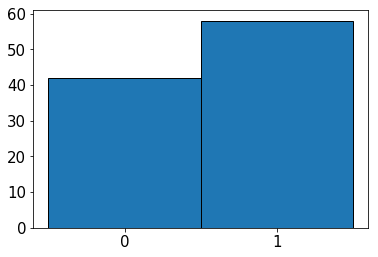

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(values, bins=[-0.5, 0.5, 1.5], histtype='bar', ec='black')
ax.set_xticks([0, 1])
ax.tick_params(labelsize=15)
plt.show()

In [8]:
dValues = rollDie(100)

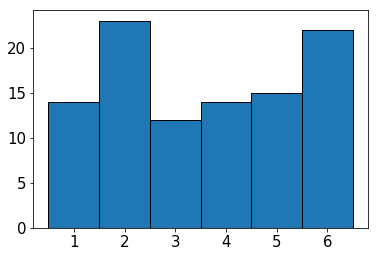

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(dValues, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], histtype='bar', ec='black')
ax.set_xticks([1, 2, 3, 4, 5, 6])
ax.tick_params(labelsize=15)
plt.show()

To do
------
* Write a function that produce a histogram from a set of values
* Use the function *simulateRV* to simulate discrete random values with any given distribution. Then, verify that the data follow the given distribution by making the corresponding histogram
* Write functions to simulate values comming from other discrete random variables: Bernoulli, Binomial
* Write a function to simulate values comming from a Poisson distribution
